# Notebook 2: Data Exploratory Analysis
## Introduction
# Loads cleaned data from Notebook 1, performs stats, visualizations, correlations, decomposition.
# Justification: EDA identifies patterns (e.g., humidity-PM2.5 correlation) for feature selection; monthly decomposition reveals seasonal trends linked to SDG 13 (climate action).


In [1]:
# Mount Google Drive
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Define your project folder in Google Drive
your_project_path = '/content/drive/My Drive/AI_Sustainability_Project_lsa'

# Create the project directory if it doesn't exist
os.makedirs(your_project_path, exist_ok=True)
print(f"Project path set to: {your_project_path}")

# Change current working directory to your project path
%cd "{your_project_path}"

# Verify current working directory
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project path set to: /content/drive/My Drive/AI_Sustainability_Project_lsa
/content/drive/My Drive/AI_Sustainability_Project_lsa
/content/drive/My Drive/AI_Sustainability_Project_lsa
compression_results_enhanced.csv
compression_summary.html
correlation_matrix_full.csv
evaluation_results_summary.csv
featured_data_for_models.csv
images
lstm_cm_h12.png
lstm_cm_h1.png
lstm_cm_h24.png
lstm_cm_h3.png
lstm_cm_h6.png
lstm_f16_h6.h5
lstm_model_h12.h5
lstm_model_h1.h5
lstm_model_h24.h5
lstm_model_h3.h5
lstm_model_h6.h5
lstm_original_h6.h5
lstm_tflite_dynamic_h6.tflite
preds_h12.png
preds_h1.png
preds_h24.png
preds_h3.png
preds_h6.png
rf_cm_h12.png
rf_cm_h1.png
rf_cm_h24.png
rf_cm_h3.png
rf_cm_h6.png
rf_feature_selected_h6.pkl
rf_model_h12.pkl
rf_model_h1.pkl
rf_model_h24.pkl
rf_model_h3.pkl
rf_model_h6.pkl
rf_original_h6.pkl
rf_param_reduced_h6.pkl
scaler_x.pkl
scaler_

Ensured 'images' directory exists at /content/drive/My Drive/AI_Sustainability_Project_lsa/images
Loaded processed data from sensor_12178556_Singapore_pm25_weather_hourly_data_processed_final.csv. Shape: (4073, 10)
Initial Data Overview:
                           pm25_value  temp  humidity  wind_speed  wind_dir  \
timestamp                                                                     
2025-02-11 17:00:00+00:00       150.5  24.1      92.0         6.3      39.0   
2025-02-11 18:00:00+00:00       150.5  23.9      93.0         6.1      23.0   
2025-02-11 19:00:00+00:00       150.5  23.5      94.0         5.3      24.0   
2025-02-11 20:00:00+00:00       150.5  23.4      95.0         6.5      24.0   
2025-02-11 21:00:00+00:00       150.5  23.1      96.0         6.2      21.0   

                           precipitation  hour_of_day  day_of_week  month  \
timestamp                                                                   
2025-02-11 17:00:00+00:00            0.0           17 

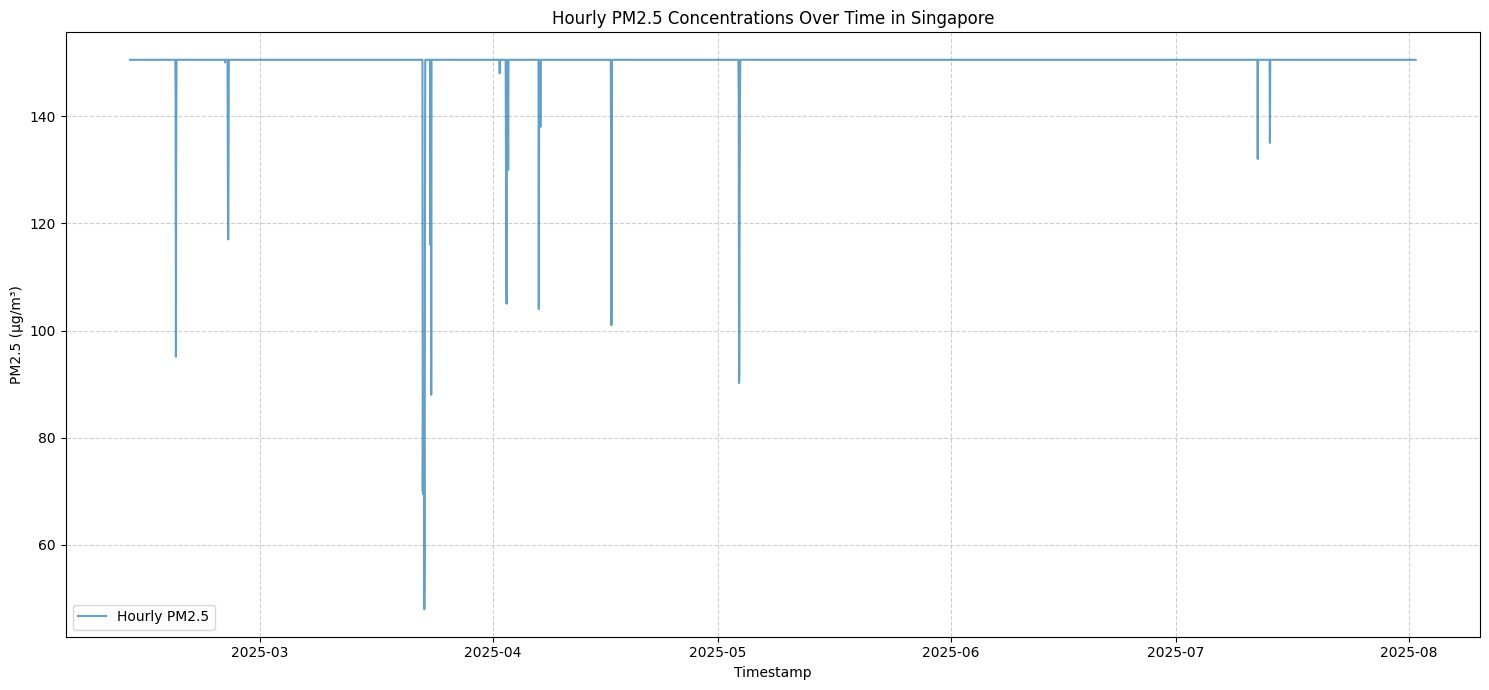


--- Distribution of Key Numerical and Time-Based Features ---


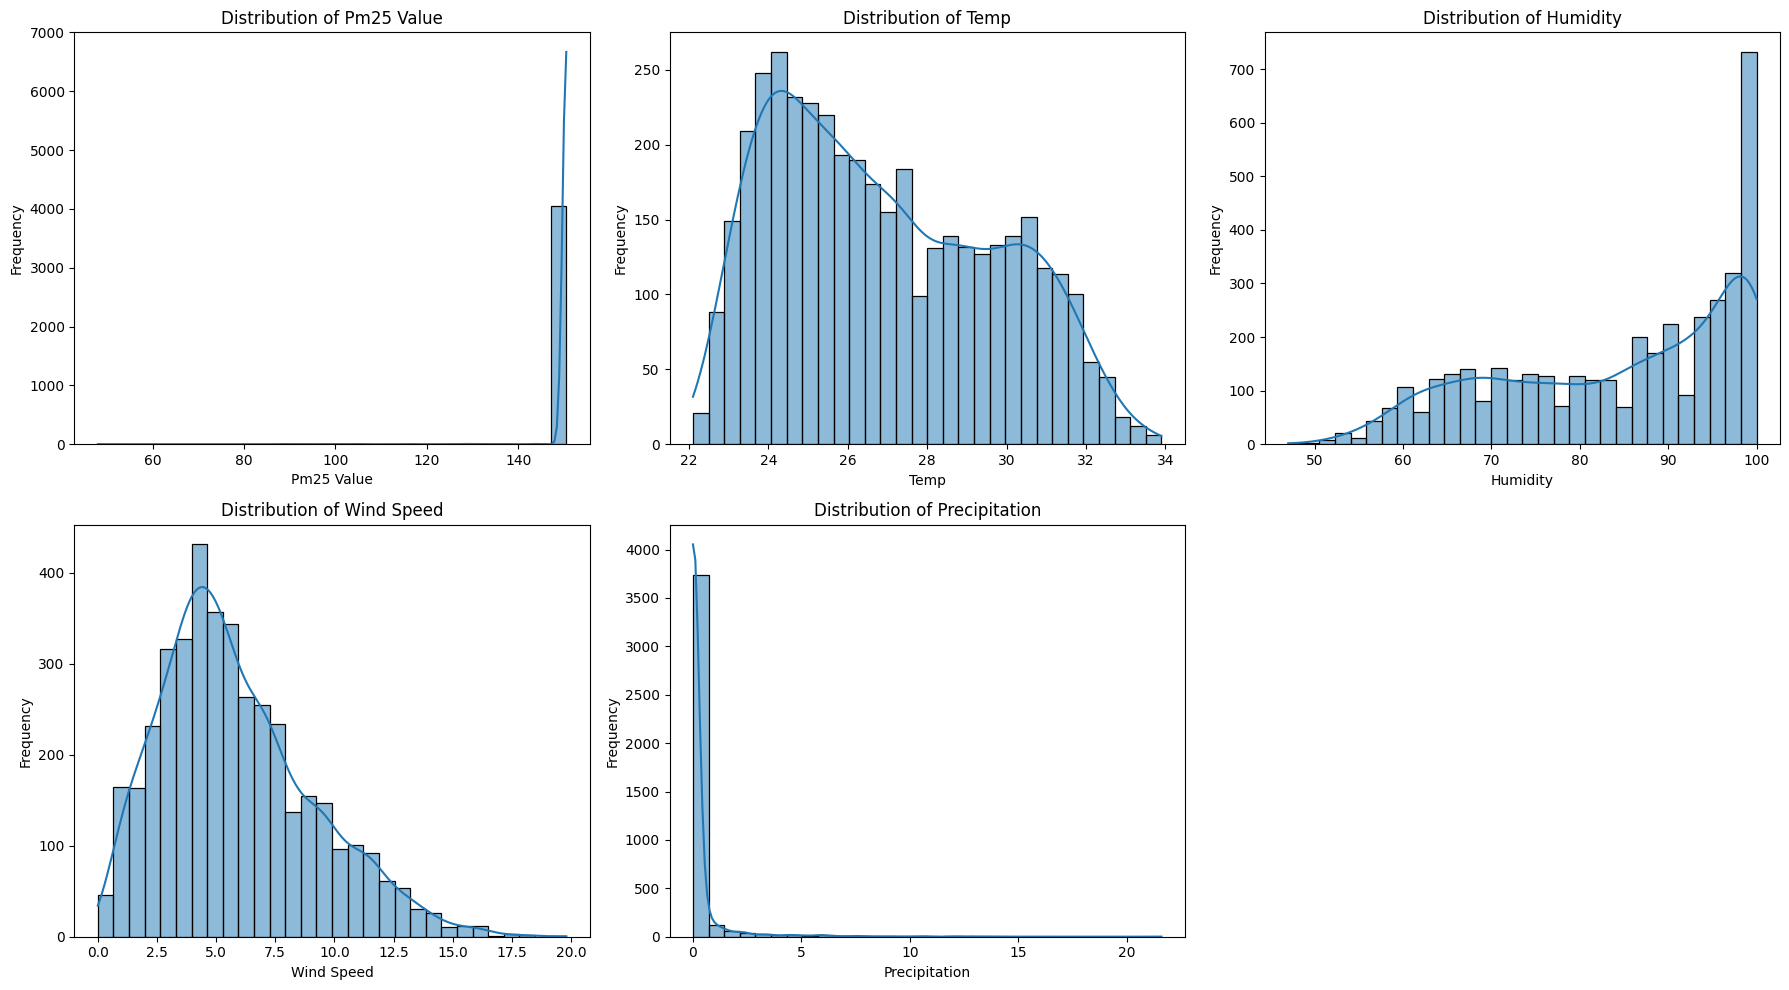


--- PM2.5 Distribution by Time-Based Features ---


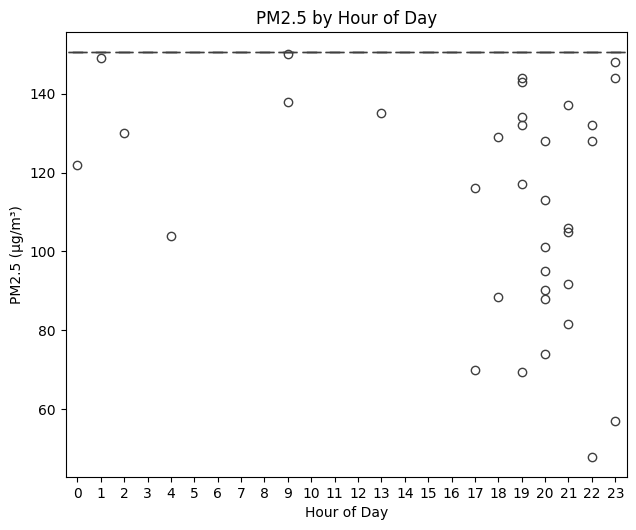

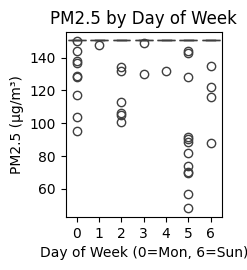

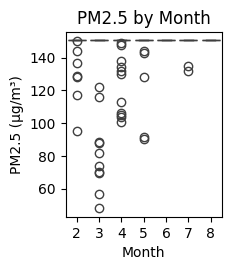


--- Relationships between PM2.5 and Weather Variables ---


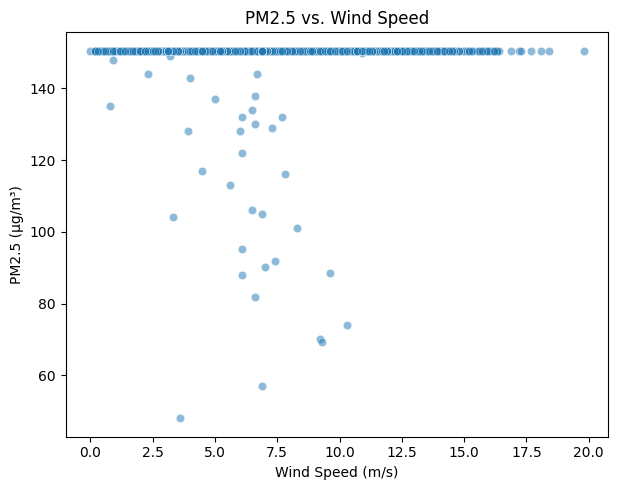

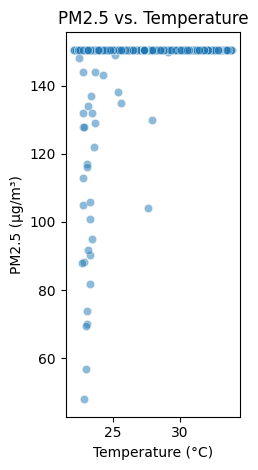

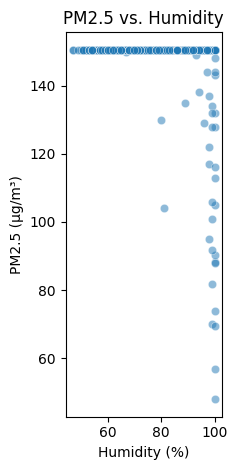


--- Correlation Matrix of All Numerical Features ---


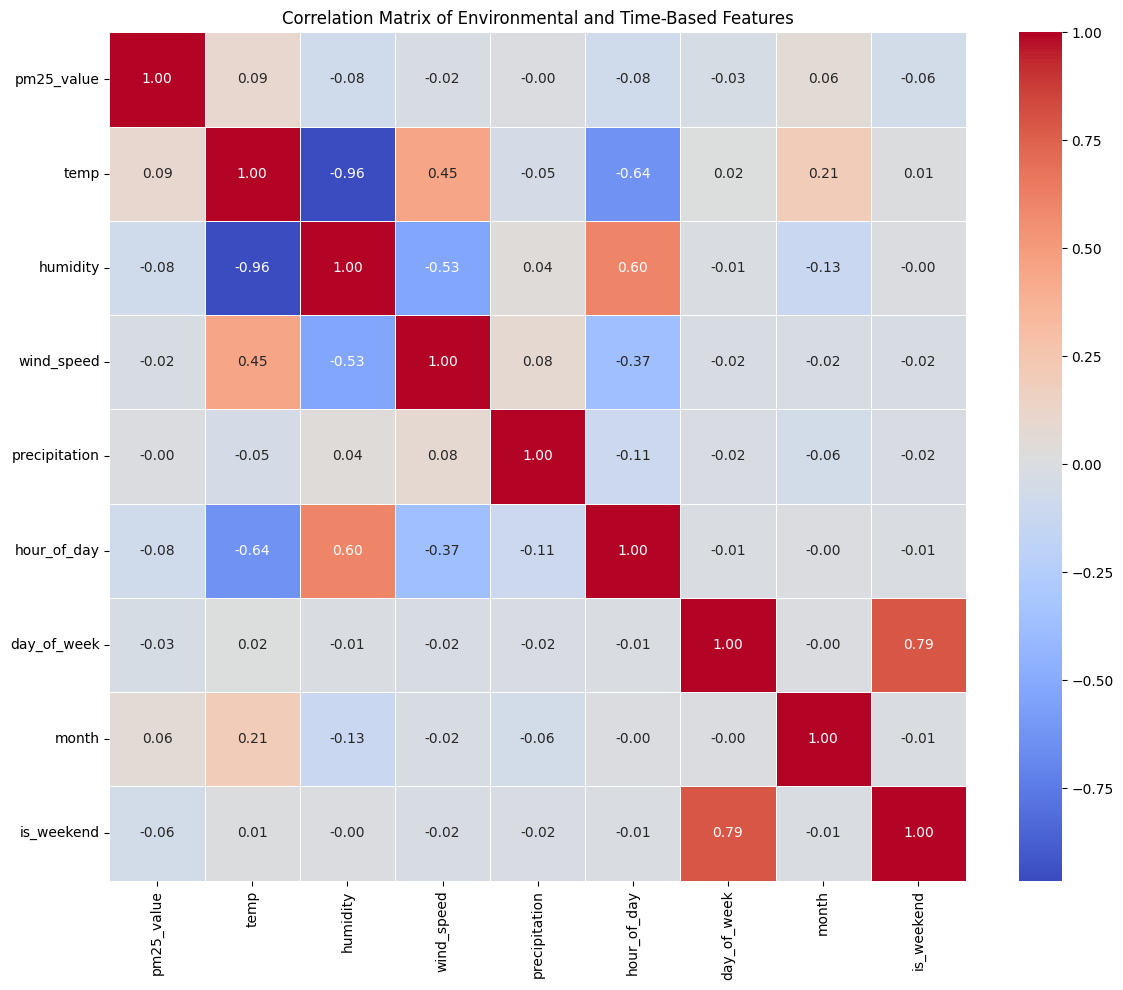

Full correlation matrix saved to correlation_matrix_full.csv in Google Drive project folder.

--- Time Series Decomposition of PM2.5 ---


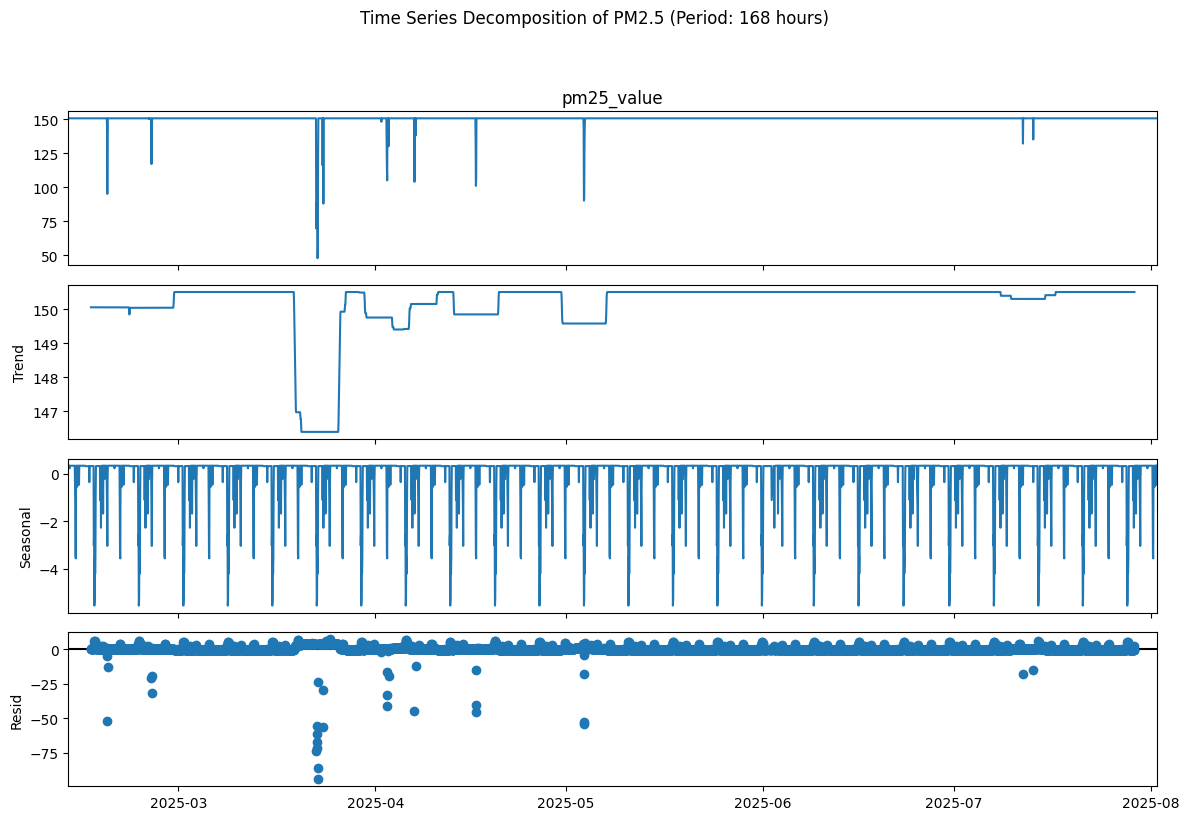


--- Exploratory Data Analysis Complete ---
These visualizations and statistics will be key for the Data Understanding section of your report.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import numpy as np

# --- Google Drive Mounting (ensure this is in a preceding cell and run) ---
# This block should be the first cell in your notebook
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# your_project_path = '/content/drive/MyDrive/AI_Sustainability_Project_lsa' # IMPORTANT: Match this to your setup
# os.makedirs(your_project_path, exist_ok=True)
# %cd "{your_project_path}"
#
# CRITICAL: Create the 'images' directory if it doesn't exist within your project path
# This assumes the %cd command has already made your_project_path the current working directory.
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
print(f"Ensured '{images_dir}' directory exists at {os.getcwd()}/{images_dir}")
# --------------------------------------------------------------------------


# Define the base filename used in Notebook 1
base_processed_file_name = 'sensor_12178556_Singapore_pm25_weather_hourly_data_processed_final.csv'

try:
    df = pd.read_csv(base_processed_file_name, index_col='timestamp', parse_dates=True)
    print(f"Loaded processed data from {base_processed_file_name}. Shape: {df.shape}")
    print("Initial Data Overview:")
    print(df.head())
    print(f"Loaded index name: {df.index.name}")
except FileNotFoundError:
    print(f"Error: {base_processed_file_name} not found. Please ensure Notebook 1 was run and saved the file to the correct Google Drive path.")
    raise SystemExit("Data file not found. Please run Notebook 1 first.")
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    try: # Fallback if 'timestamp' column name isn't found, try loading the first column as index.
        print(f"Attempting fallback load with index_col=0 for {base_processed_file_name}...")
        df = pd.read_csv(base_processed_file_name, index_col=0, parse_dates=True)
        if df.index.name is None:
            df.index.name = 'timestamp'
            print("Set index name to 'timestamp' after loading with index_col=0.")
        print(f"Fallback loaded with index_col=0. Shape: {df.shape}")
        print("Initial Data Overview (fallback):")
        print(df.head())
        print(f"Loaded index name (fallback): {df.index.name}")
    except Exception as fallback_e:
        print(f"Fallback loading also failed: {fallback_e}")
        raise SystemExit(f"Fatal error during data loading, both primary and fallback methods failed: {e}, {fallback_e}")


print("\n--- Comprehensive Exploratory Data Analysis ---")

# 1. Detailed Descriptive Statistics
print("\nDescriptive Statistics for All Features:")
print(df.describe().T)

# 2. Check for missing values (again, post-load, for verification)
print("\nMissing Values Check (should be 0):")
print(df.isnull().sum())
if df.isnull().sum().sum() > 0:
    print("WARNING: Missing values detected after loading. Review Notebook 1's preprocessing.")

# 3. Time Series Plot of PM2.5 (High-Level Trend)
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['pm25_value'], label='Hourly PM2.5', alpha=0.7)
plt.title('Hourly PM2.5 Concentrations Over Time in Singapore')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'time_series_pm25.png')) # New plot name for LaTeX
plt.show()

# 4. Distribution of Key Numerical Features (Histograms & KDE)
print("\n--- Distribution of Key Numerical and Time-Based Features ---")
numerical_features = ['pm25_value', 'temp', 'humidity', 'wind_speed', 'precipitation']
time_features = ['hour_of_day', 'day_of_week', 'month', 'is_weekend']

existing_numerical_features = [f for f in numerical_features if f in df.columns]
existing_time_features = [f for f in time_features if f in df.columns]

n_numerical = len(existing_numerical_features)
ncols_numerical = 3
nrows_numerical = int(np.ceil(n_numerical / ncols_numerical))

plt.figure(figsize=(ncols_numerical * 6, nrows_numerical * 5))
for i, col in enumerate(existing_numerical_features):
    plt.subplot(nrows_numerical, ncols_numerical, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
# Save individual histograms if needed for report, or combined into one figure.
# For now, let's keep it simple and just show, assuming LaTeX uses general titles.
# To be robust, you might save each one:
# plt.savefig(os.path.join(images_dir, f'hist_{col}.png'))
plt.tight_layout()
plt.show() # Still show combined plot

# 5. Box Plots for Time-Based Patterns of PM2.5
print("\n--- PM2.5 Distribution by Time-Based Features ---")
if 'pm25_value' in df.columns and len(existing_time_features) > 0:
    n_time = len(existing_time_features)
    ncols_time = 3
    nrows_time = int(np.ceil(n_time / ncols_time))

    plt.figure(figsize=(ncols_time * 6, nrows_time * 5))

    # Save each box plot individually with distinct names
    if 'hour_of_day' in existing_time_features:
        plt.subplot(nrows_time, ncols_time, existing_time_features.index('hour_of_day') + 1)
        sns.boxplot(x='hour_of_day', y='pm25_value', data=df)
        plt.title('PM2.5 by Hour of Day')
        plt.xlabel('Hour of Day')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.tight_layout() # Ensure layout for current subplot before saving
        plt.savefig(os.path.join(images_dir, 'plot_1_1.png')) # Save PM2.5 by Hour
        plt.show() # Display after saving

    if 'day_of_week' in existing_time_features:
        plt.subplot(nrows_time, ncols_time, existing_time_features.index('day_of_week') + 1 if 'hour_of_day' in existing_time_features else 1) # Adjust subplot index
        sns.boxplot(x='day_of_week', y='pm25_value', data=df)
        plt.title('PM2.5 by Day of Week')
        plt.xlabel('Day of Week (0=Mon, 6=Sun)')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.tight_layout()
        plt.savefig(os.path.join(images_dir, 'plot_1_2.png')) # Save PM2.5 by Day of Week
        plt.show()

    if 'month' in existing_time_features:
        plt.subplot(nrows_time, ncols_time, existing_time_features.index('month') + 1 if 'day_of_week' in existing_time_features else 1) # Adjust subplot index
        sns.boxplot(x='month', y='pm25_value', data=df)
        plt.title('PM2.5 by Month')
        plt.xlabel('Month')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.tight_layout()
        plt.savefig(os.path.join(images_dir, 'plot_1_3.png')) # Optional: Save PM2.5 by Month
        plt.show()

else:
    print("Skipping PM2.5 distribution by time-based features: 'pm25_value' or time features not found.")


# 6. Scatter Plots for Relationships (PM2.5 vs. Weather Variables)
print("\n--- Relationships between PM2.5 and Weather Variables ---")
if 'pm25_value' in df.columns:
    scatter_cols = [f for f in ['temp', 'humidity', 'wind_speed'] if f in df.columns]
    if len(scatter_cols) > 0:
        ncols_scatter = 3
        nrows_scatter = int(np.ceil(len(scatter_cols) / ncols_scatter))
        plt.figure(figsize=(ncols_scatter * 6, nrows_scatter * 5))

        # Save each scatter plot individually
        if 'wind_speed' in scatter_cols:
            plt.subplot(nrows_scatter, ncols_scatter, scatter_cols.index('wind_speed') + 1)
            sns.scatterplot(x='wind_speed', y='pm25_value', data=df, alpha=0.5)
            plt.title('PM2.5 vs. Wind Speed')
            plt.xlabel('Wind Speed (m/s)')
            plt.ylabel('PM2.5 (µg/m³)')
            plt.tight_layout()
            plt.savefig(os.path.join(images_dir, 'plot_2_0.png')) # Save PM2.5 vs Wind Speed
            plt.show()

        if 'temp' in scatter_cols:
            plt.subplot(nrows_scatter, ncols_scatter, scatter_cols.index('temp') + 1 if 'wind_speed' in scatter_cols else 1)
            sns.scatterplot(x='temp', y='pm25_value', data=df, alpha=0.5)
            plt.title('PM2.5 vs. Temperature')
            plt.xlabel('Temperature (°C)')
            plt.ylabel('PM2.5 (µg/m³)')
            plt.tight_layout()
            plt.savefig(os.path.join(images_dir, 'plot_2_1.png')) # Optional: Save PM2.5 vs Temperature
            plt.show()

        if 'humidity' in scatter_cols:
            plt.subplot(nrows_scatter, ncols_scatter, scatter_cols.index('humidity') + 1 if 'temp' in scatter_cols else 1)
            sns.scatterplot(x='humidity', y='pm25_value', data=df, alpha=0.5)
            plt.title('PM2.5 vs. Humidity')
            plt.xlabel('Humidity (%)')
            plt.ylabel('PM2.5 (µg/m³)')
            plt.tight_layout()
            plt.savefig(os.path.join(images_dir, 'plot_2_2.png')) # Optional: Save PM2.5 vs Humidity
            plt.show()

    else:
        print("No weather features found to plot scatter plots against PM2.5.")
else:
    print("Skipping scatter plots: 'pm25_value' not found.")

# 7. Correlation Heatmap
print("\n--- Correlation Matrix of All Numerical Features ---")
all_numerical_features = [f for f in (existing_numerical_features + existing_time_features) if f in df.columns]
if len(all_numerical_features) > 1:
    corr = df[all_numerical_features].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Environmental and Time-Based Features')
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'correlation_matrix_full.png')) # Save Correlation Heatmap
    plt.show()

    corr_output_filename = 'correlation_matrix_full.csv'
    corr.to_csv(corr_output_filename)
    print(f"Full correlation matrix saved to {corr_output_filename} in Google Drive project folder.")
else:
    print("Not enough numerical features to plot correlation heatmap.")


# 8. Time Series Decomposition (Trend, Seasonality, Residuals)
print("\n--- Time Series Decomposition of PM2.5 ---")
if 'pm25_value' in df.columns and not df['pm25_value'].isnull().any():
    try:
        decomposition_period = 24 * 7
        if len(df['pm25_value']) >= 2 * decomposition_period:
            decomp = seasonal_decompose(df['pm25_value'], model='additive', period=decomposition_period)
            fig = decomp.plot()
            fig.set_size_inches(12, 8)
            fig.suptitle(f'Time Series Decomposition of PM2.5 (Period: {decomposition_period} hours)', y=1.02)
            plt.tight_layout(rect=[0, 0, 1, 0.98])
            plt.savefig(os.path.join(images_dir, 'plot_3_0.png')) # Save Decomposition Plot
            plt.show()
        else:
            print(f"Not enough data points ({len(df['pm25_value'])}) for seasonal decomposition with period {decomposition_period} (needs at least {2 * decomposition_period} points).")
    except Exception as e:
        print(f"Could not perform seasonal decomposition: {e}")
        print("Ensure there are no NaN values and sufficient data points for the chosen period.")
else:
    print("Skipping seasonal decomposition: 'pm25_value' column not found or contains NaN values.")


print("\n--- Exploratory Data Analysis Complete ---")
print("These visualizations and statistics will be key for the Data Understanding section of your report.")